In [1]:
import pandas as pd

file_path = r"E:\DAV_Project\Data\LoanDefaultData.csv"  # Use raw string to avoid escape issues
df = pd.read_csv(file_path)

df.head()


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,...,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/07,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,...,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/07,1072010,0.5,RENT,Low,INDIVIDUAL,other,...,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/07,1062010,10.0,RENT,Low,INDIVIDUAL,other,...,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/07,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,...,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/07,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,...,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


In [2]:
# Step 2: Data Preprocessing

missing_values = df.isnull().sum()

duplicate_count = df.duplicated().sum()

data_types = df.dtypes

print("Missing Values:\n", missing_values[missing_values > 0])
print("\nNumber of Duplicate Rows:", duplicate_count)
print("\nData Types:\n", data_types)


Missing Values:
 Series([], dtype: int64)

Number of Duplicate Rows: 0

Data Types:
 cust_id                int64
year                   int64
state                 object
date_issued           object
date_final             int64
emp_duration         float64
own_type              object
income_type           object
app_type              object
loan_purpose          object
interest_payments     object
grade                 object
annual_pay             int64
loan_amount            int64
interest_rate        float64
loan_duration         object
dti                  float64
total_pymnt          float64
total_rec_prncp      float64
recoveries           float64
installment          float64
is_default             int64
dtype: object


In [3]:
#Summary Statistics
df.describe()


,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
count,2999.000000,2999.000000,2.999000e+03,2999.000000,2.999000e+03,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,273160.754918,2007.799933,1.064774e+06,3.972824,6.515879e+04,8710.478493,12.014908,12.698343,8365.527743,6934.841944,103.943505,276.030223,0.218073
std,86230.990220,0.402610,3.581388e+04,3.507689,6.198929e+04,5829.076223,2.570647,7.414989,6259.856987,5302.355560,840.222837,190.477069,0.413006
min,55521.000000,2007.000000,1.012008e+06,0.500000,1.896000e+03,500.000000,6.000000,0.000000,0.000000,0.000000,0.000000,15.670000,0.000000
25%,210781.000000,2008.000000,1.032011e+06,1.000000,3.600000e+04,4800.000000,10.110000,6.735000,3766.200000,3000.000000,0.000000,142.410000,0.000000
50%,289873.000000,2008.000000,1.062010e+06,3.000000,5.200000e+04,7500.000000,11.780000,12.430000,6783.620000,5600.000000,0.000000,230.450000,0.000000
75%,352198.500000,2008.000000,1.102008e+06,7.000000,7.719200e+04,11200.000000,13.750000,18.480000,11156.895000,9600.000000,0.000000,347.000000,0.000000
max,375466.000000,2009.000000,1.122011e+06,10.000000,2.039784e+06,25000.000000,19.470000,29.960000,39473.920000,25000.000000,27750.000000,902.060000,1.000000


C:\Users\Soham\AppData\Local\Temp\ipykernel_20152\250525206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['is_default'], palette="coolwarm")


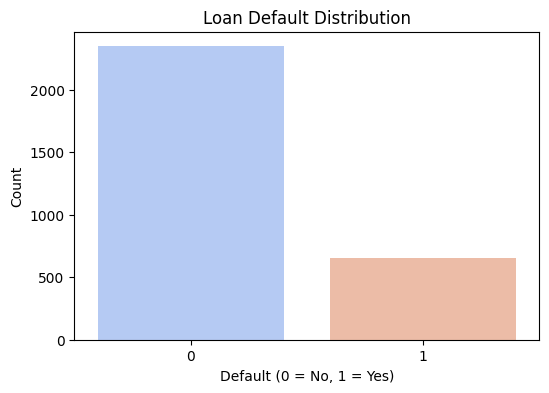

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df['is_default'], palette="coolwarm")
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


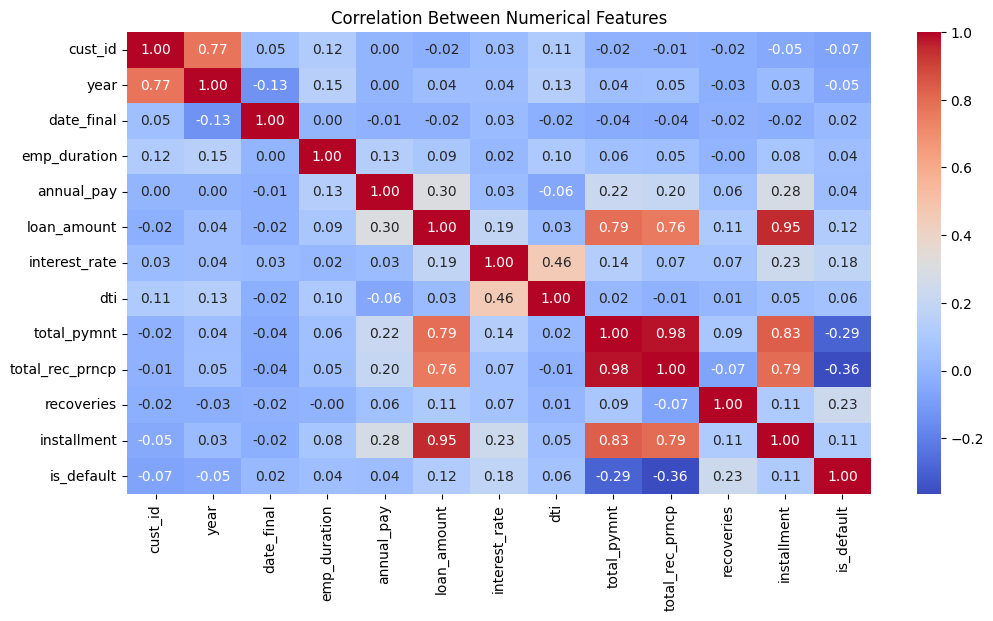

In [6]:
# Correlation Heatmap (Only Numerical Columns)
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


C:\Users\Soham\AppData\Local\Temp\ipykernel_20152\2059865478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['loan_purpose'], order=df['loan_purpose'].value_counts().index, palette="viridis")


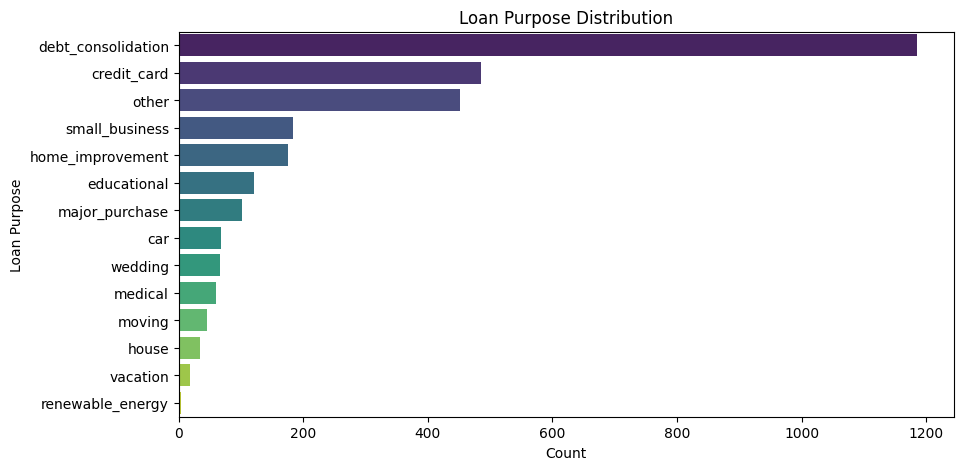

In [7]:
# Loan Purpose Distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df['loan_purpose'], order=df['loan_purpose'].value_counts().index, palette="viridis")
plt.title("Loan Purpose Distribution")
plt.xlabel("Count")
plt.ylabel("Loan Purpose")
plt.show()


In [9]:
#Convert date_issued to datetime format
df['date_issued'] = pd.to_datetime(df['date_issued'], errors='coerce')

df['year_issued'] = df['date_issued'].dt.year
df['month_issued'] = df['date_issued'].dt.month

df = df.drop(columns=['date_issued'])

df.head()


C:\Users\Soham\AppData\Local\Temp\ipykernel_20152\1224385343.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_issued'] = pd.to_datetime(df['date_issued'], errors='coerce')


,cust_id,year,state,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,...,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default,year_issued,month_issued
0,180675,2007,0,1032009,10.0,0,1,0,2,1,...,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1,2007,1
1,85781,2007,20,1072010,0.5,4,1,0,9,1,...,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0,2007,1
2,85675,2007,14,1062010,10.0,4,1,0,9,0,...,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0,2007,1
3,84918,2007,0,1042008,10.0,0,1,0,9,1,...,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0,2007,1
4,84670,2007,1,1082009,10.0,0,0,0,9,1,...,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0,2007,1


In [10]:
#feature selection 
#Drop irrelevant columns
df = df.drop(columns=['cust_id']) 

X = df.drop(columns=['is_default']) 
y = df['is_default'] 

print("Final Feature Set:", X.columns)


Final Feature Set: Index(['year', 'state', 'date_final', 'emp_duration', 'own_type',
       'income_type', 'app_type', 'loan_purpose', 'interest_payments', 'grade',
       'annual_pay', 'loan_amount', 'interest_rate', 'loan_duration', 'dti',
       'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment',
       'year_issued', 'month_issued'],
      dtype='object')


In [11]:
#Data preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed! Ready for model training.")


Data preprocessing completed! Ready for model training.


In [12]:
#model trainingd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       469
           1       0.99      0.89      0.94       131

    accuracy                           0.97       600
   macro avg       0.98      0.95      0.96       600
weighted avg       0.98      0.97      0.97       600



In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.98

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       469
           1       1.00      0.92      0.96       131

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



C:\Users\Soham\AppData\Local\Temp\ipykernel_20152\3768848360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_default', data=df, palette="Set2")


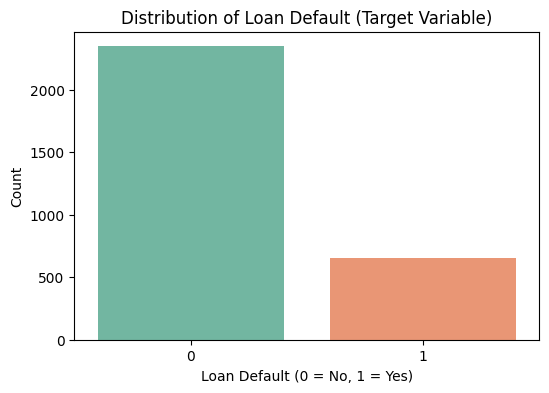

In [14]:

plt.figure(figsize=(6,4))
sns.countplot(x='is_default', data=df, palette="Set2")
plt.title("Distribution of Loan Default (Target Variable)")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


C:\Users\Soham\AppData\Local\Temp\ipykernel_20152\640100158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_default', y='loan_amount', data=df, palette="Set1")


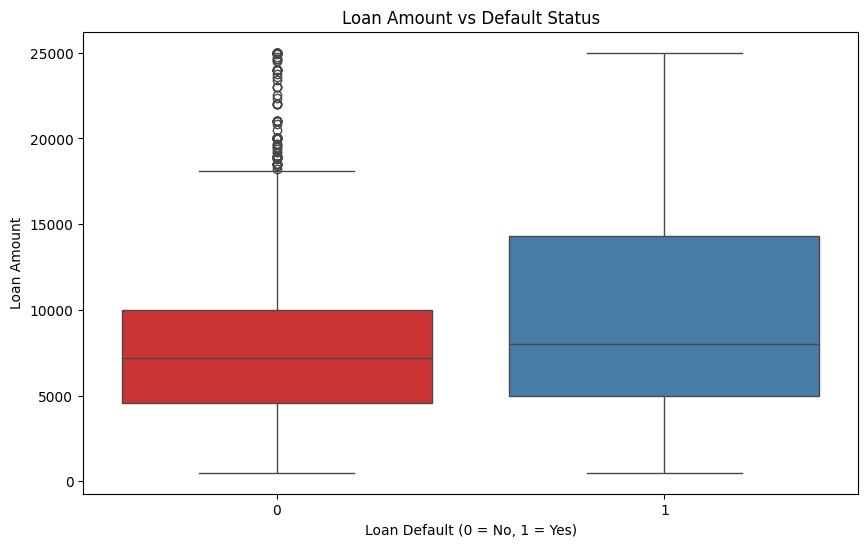

In [15]:
#Loan Amount vs Default Status
plt.figure(figsize=(10,6))
sns.boxplot(x='is_default', y='loan_amount', data=df, palette="Set1")
plt.title("Loan Amount vs Default Status")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Loan Amount")
plt.show()


C:\Users\Soham\AppData\Local\Temp\ipykernel_20152\2753071255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_default', y='annual_pay', data=df, palette="Set2")


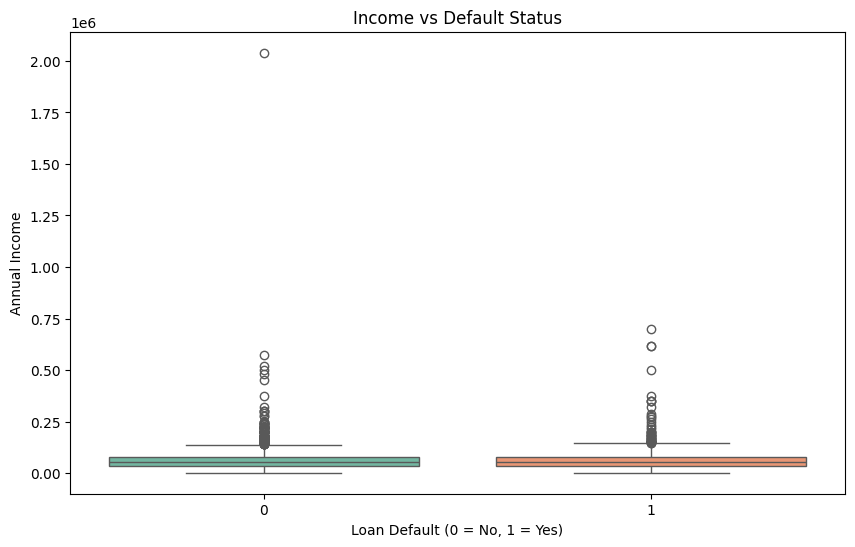

In [16]:
#Visualize Income vs Loan Default
plt.figure(figsize=(10,6))
sns.boxplot(x='is_default', y='annual_pay', data=df, palette="Set2")
plt.title("Income vs Default Status")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Annual Income")
plt.show()


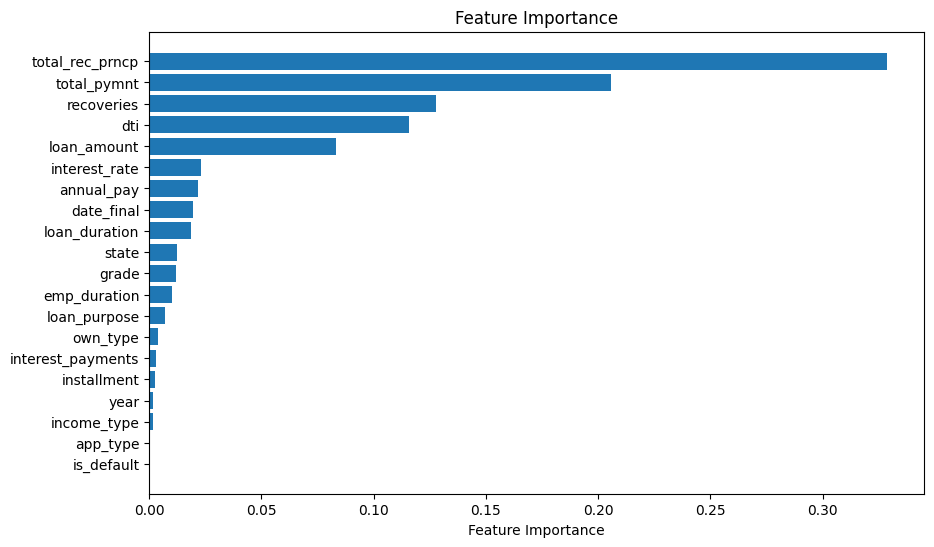

In [19]:
import numpy as np  

#Feature Importance using Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), df.columns[indices])
plt.xlabel("Feature Importance")
plt.show()


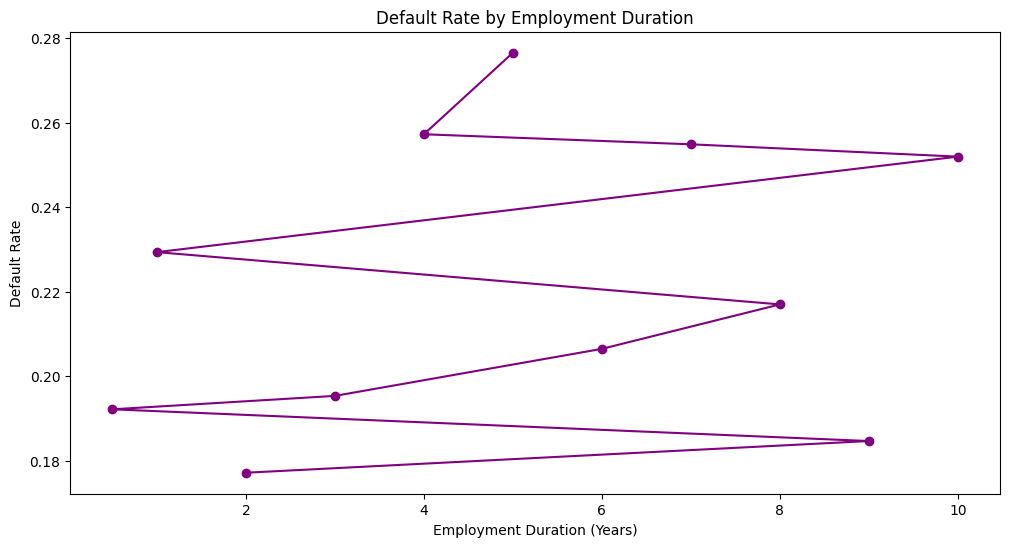

In [21]:
#Default Rate by Employment Duration
emp_default_rate = df.groupby('emp_duration')['is_default'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
emp_default_rate.plot(kind='line', color="purple", marker='o')
plt.title("Default Rate by Employment Duration")
plt.xlabel("Employment Duration (Years)")
plt.ylabel("Default Rate")
plt.show()


KeyError: 'is_default'

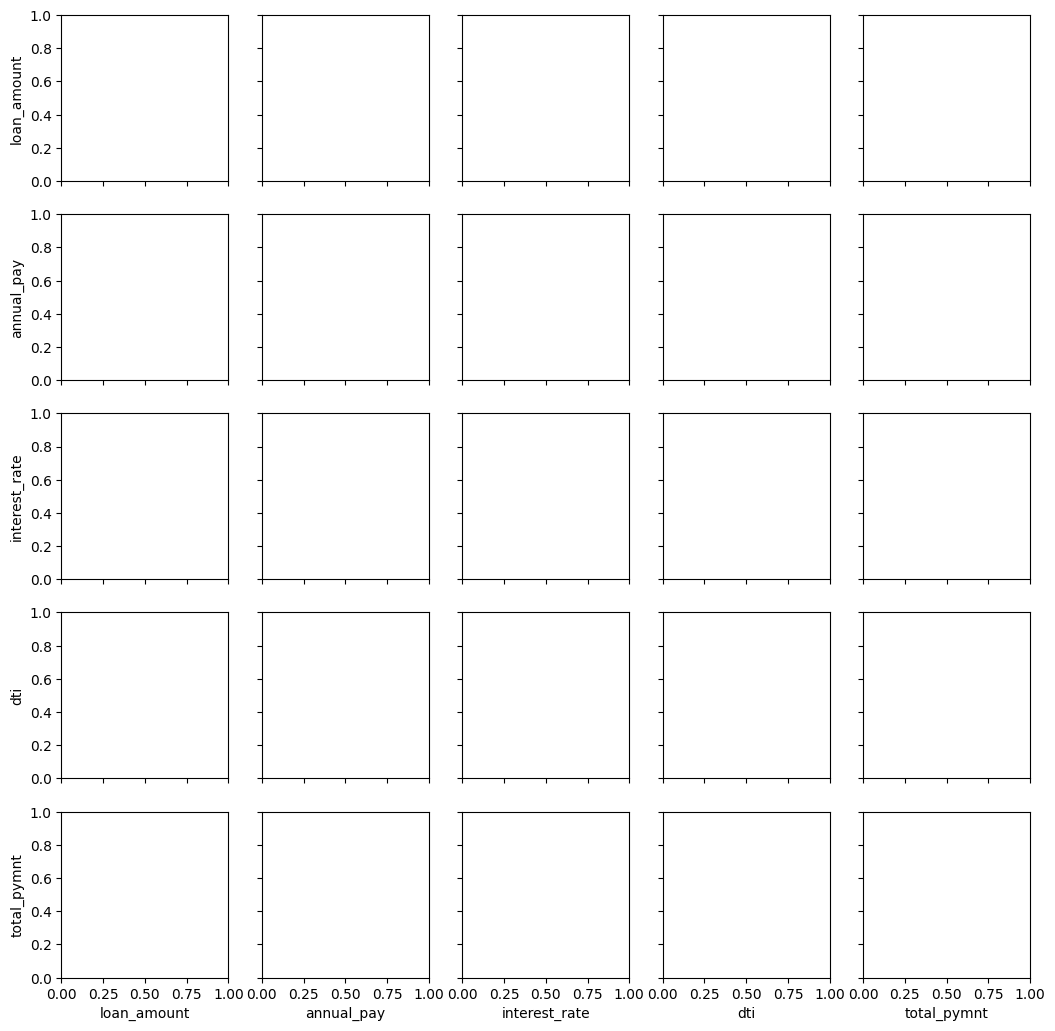

In [25]:
# Select key features
selected_features = ['loan_amount', 'annual_pay', 'interest_rate', 'dti', 'total_pymnt']
sns.pairplot(df[selected_features], hue='is_default', palette='Set2')
plt.show()





In [24]:
print(df.columns)


Index(['year', 'state', 'date_final', 'emp_duration', 'own_type',
       'income_type', 'app_type', 'loan_purpose', 'interest_payments', 'grade',
       'annual_pay', 'loan_amount', 'interest_rate', 'loan_duration', 'dti',
       'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment',
       'is_default', 'year_issued', 'month_issued'],
      dtype='object')
